# DBSCAN Clustering Lab Task

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


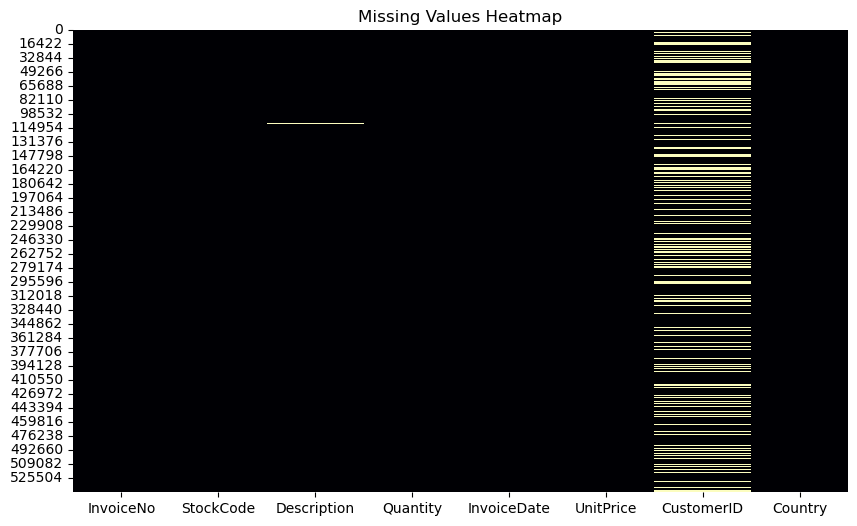

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='magma', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

I checked for missing values and removed negative or incorrect values to ensure my analysis is based on valid data.I also converted the CustomerID datatype to ensure it was properly recognized as a categorical or numerical value, allowing for accurate grouping and analysis. Without this, the model might misinterpret customer identifiers or fail to cluster correctly.

In [9]:
# Remove rows with missing CustomerID
df = df.dropna(subset=["CustomerID"])

# Remove rows with negative or zero Quantity and UnitPrice
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]

# Convert CustomerID to integer type
df["CustomerID"] = df["CustomerID"].astype(int)

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [10]:
# Create a new Revenue column
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# Aggregate customer behavior
customer_data = df.groupby("CustomerID").agg(
    TotalSpending=("Revenue", "sum"),
    TotalQuantity=("Quantity", "sum"),
    TotalTransactions=("InvoiceNo", "nunique")
).reset_index()

customer_data.describe()

,CustomerID,TotalSpending,TotalQuantity,TotalTransactions
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,2054.266460,1191.289073,4.272015
std,1721.808492,8989.230441,5046.081546,7.697998
min,12346.000000,3.750000,1.000000,1.000000
25%,13813.250000,307.415000,160.000000,1.000000
50%,15299.500000,674.485000,379.000000,2.000000
75%,16778.750000,1661.740000,992.750000,5.000000
max,18287.000000,280206.020000,196915.000000,209.000000


Since DBSCAN relies on distance-based clustering, I standardized the features to ensure fair comparisons.

In [12]:
# Standardizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[["TotalSpending", "TotalQuantity", "TotalTransactions"]])

I applied the DBSCAN clustering algorithm with eps=2 and min_samples=3 to group similar customers based on their purchasing behavior. I then assigned the cluster labels to each customer, helping me identify patterns and outliers in the data.

In [14]:
# Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=3)  # Adjust hyperparameters
clusters = dbscan.fit_predict(scaled_features)
# Assign clusters
customer_data["Cluster"] = clusters

In [15]:
# Count noise points and clusters
noise_count = np.sum(clusters == -1)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

print(f"Total Noise Points: {noise_count}")
print(f"Total Clusters Found: {num_clusters}")

Total Noise Points: 28
Total Clusters Found: 2


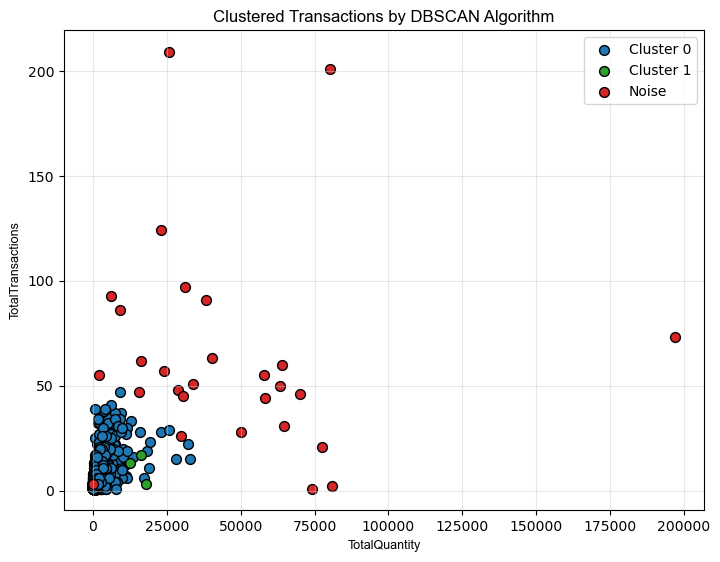

In [16]:
# Plot clusters and outliers
clusters_df = customer_data[customer_data["Cluster"] != -1]
outliers_df = customer_data[customer_data["Cluster"] == -1]

# Define cluster colors explicitly
cluster_colors = {0: "#1f77b4",  # Blue for Cluster 0
                  1: "#2ca02c"}  # Green for Cluster 1

fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])

# Plot each cluster with its respective color
for cluster, color in cluster_colors.items():
    cluster_points = clusters_df[clusters_df["Cluster"] == cluster]
    ax.scatter(cluster_points["TotalQuantity"], cluster_points["TotalTransactions"],
               color=color, edgecolors='black', s=50, label=f"Cluster {cluster}")

# Plot noise (outliers) in red
ax.scatter(outliers_df["TotalQuantity"], outliers_df["TotalTransactions"],
           color='#d62728', edgecolors='black', s=50, label="Noise")  # Red for noise

ax.set_xlabel("TotalQuantity", family="Arial", fontsize=9)
ax.set_ylabel("TotalTransactions", family="Arial", fontsize=9)

plt.title("Clustered Transactions by DBSCAN Algorithm", family="Arial", fontsize=12)
plt.grid(which="major", color="#cccccc", alpha=0.45)
plt.legend()  # Add legend for clarity

plt.show()

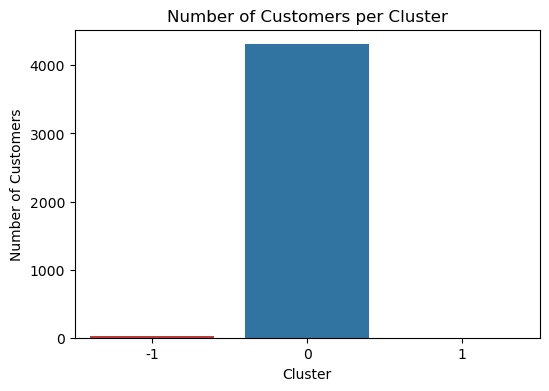

In [17]:
# Define custom colors for clusters
cluster_palette = {"0": "#1f77b4",  # Blue for Cluster 0
                   "1": "#2ca02c",  # Green for Cluster 1
                   "-1": "#d62728"}  # Red for Noise (-1 in DBSCAN)

# Convert cluster labels to strings to match the palette keys
customer_data["Cluster"] = customer_data["Cluster"].astype(str)

plt.figure(figsize=(6, 4))
sns.countplot(x=customer_data["Cluster"], palette=cluster_palette)

plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Number of Customers per Cluster")

plt.show()

In [18]:
# Load the saved CSV file
df_Knn = pd.read_csv("Knn_customer_data.csv")
print("CSV file loaded successfully!")

CSV file loaded successfully!


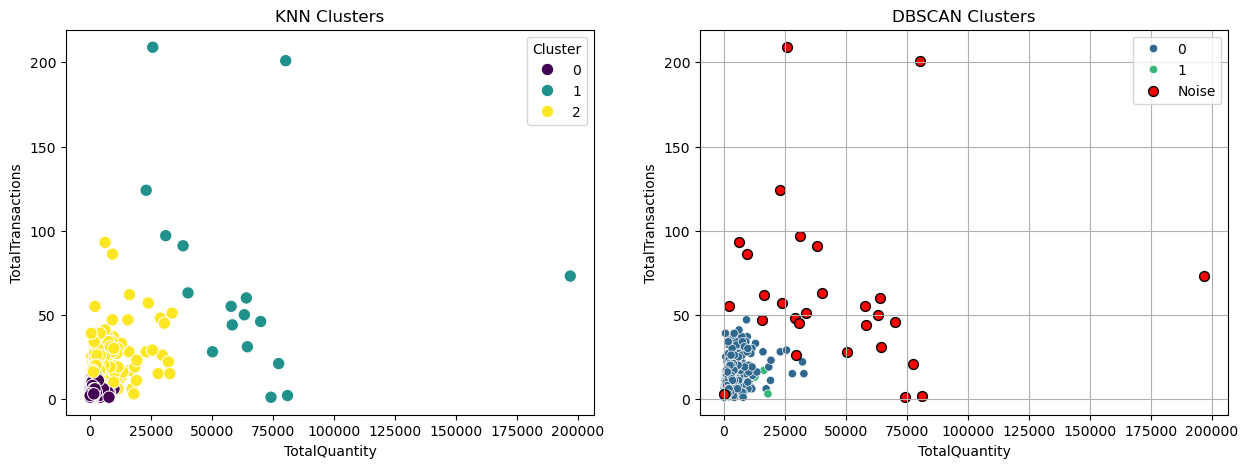

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# KNN Scatter Plot
sns.scatterplot(x='TotalQuantity', y='TotalTransactions', data=df_Knn, hue='Cluster', palette="viridis", s=80, ax=ax[0])
ax[0].set_title("KNN Clusters")

# Ensure clusters_df is not empty before plotting
if not clusters_df.empty:
    sns.scatterplot(x='TotalQuantity', y='TotalTransactions', data=clusters_df, hue='Cluster', palette="viridis", ax=ax[1])

# Ensure outliers_df is not empty before plotting
if not outliers_df.empty:
    ax[1].scatter(outliers_df["TotalQuantity"], outliers_df["TotalTransactions"],
                  color='red', edgecolors='black', s=50, label="Noise")

ax[1].set_xlabel("TotalQuantity")
ax[1].set_ylabel("TotalTransactions")
ax[1].set_title("DBSCAN Clusters")
ax[1].grid(True)
ax[1].legend()

plt.show()

# Analysis to compare K_means with DBSCAN.

**Cluster Formation**

**K-Means (Lab 11):**

The optimal number of clusters was determined using the Elbow Method, and K=3 was selected.

Each data point was assigned to one of these 3 clusters.

**DBSCAN (Lab 12):**

The eps parameter was set to 2, and min_samples was 3.

DBSCAN automatically determined the number of clusters.

Some points were classified as noise (Cluster = -1), meaning DBSCAN detected outliers that didn't belong to any cluster.

**Visualization**

**K-Means:**

The clusters were formed based on distance to centroids, which likely led to well-separated clusters.
    
However, no explicit handling of noise/outliers.

**DBSCAN:**

Used scatter plots and count plots to show clusters.
    
Noise points were explicitly marked and visualized in red.

Cluster colors were well-defined.